**Cython** is a superset of python programming language that gives access into c/c++ constructs. 
- Cython acts as a bridge between Python and C/C++.

Load cython notebook extension (and i have already installed cython )

In [1]:
%load_ext cython

In [6]:
%%cython
'''Inside this cell is Cython Code only
'''

def first_cython_function(int i):
    return i * 3.1415926;


In [7]:
# use cython function in a separate (python) cell
first_cython_function(10)

31.415926

In [8]:
%%cython?

In [16]:
def foo(a, b):
    return a + b

In [18]:
from dis import dis 
# disassebles compiled python objects
dis(foo)

  2           0 LOAD_FAST                0 (a)
              2 LOAD_FAST                1 (b)
              4 BINARY_ADD
              6 RETURN_VALUE


In [19]:
%%cython
def cyfoo(a, b):
    return a + b

In [20]:
%timeit foo(1000000, 2000000)

180 ns ± 27.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [21]:
%timeit cyfoo(1000000, 2000000)

140 ns ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [32]:
%timeit foo('x', 'y')

283 ns ± 42.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [33]:
%timeit cyfoo('x', 'y')

247 ns ± 26.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [38]:
def pyfac(n):
    if n <= 1:
        return 1
    return n * pyfac(n -1)

In [39]:
%timeit pyfac(20.0)

5.05 µs ± 449 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
%%cython

def cyfac(n):
    if n <= 1:
        return 1
    return n * cyfac(n-1)

def cyfac_double(double n):
    if n <= 1:
        return 1.0
    return n * cyfac_double(n-1)

In [42]:
%timeit cyfac(20.0)

3.99 µs ± 350 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [43]:
%timeit cyfac_double(20.0)

2.52 µs ± 377 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
%%cython

cpdef double cyfac_double_fast(double n):
    if n <= 1:
        return 1.0
    return n * cyfac_double_fast(n - 1)

In [45]:
%timeit cyfac_double_fast(20.0)

170 ns ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [46]:
### Loop based version
def pyfac_loop(n):
    r = 1.0
    for i in range(1, n+1):
        r *= i
    return r

In [47]:
%timeit pyfac_loop(20)

2.09 µs ± 132 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
%%cython
cpdef double cyfac_loop(int n):
    cdef double r = 1.0
    cdef int i
    for i in range(1, n+1):
        r *= <double>i
    return r
    

In [50]:
%timeit cyfac_loop(20)

187 ns ± 29.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Integral Types

In [54]:
%%cython

# cdef is an directive , telling objects are c objects
cdef:
    int i = 0
    unsigned long j = 1
    signed short k = -3
    bint flag = True
    long long ll = 1LL
    float a = 1.0
    double b = -2.0
    long double c= 1e5
    str s = "abc"
    
    
print(i, j, k, ll, flag, a, b, c, s)    

0 1 -3 1 True 1.0 -2.0 100000.0 abc


In [ ]:
%%cython 

import datetime
cimport cpython.datetime 

import array
cimport cpython.array

### Example spin field

In [55]:
import numpy as np

In [57]:
def random_spin_field(N, M):
    return np.random.choice([-1, 1], size = (N, M))

In [65]:
field = random_spin_field(10, 10)
field

array([[ 1,  1, -1, -1, -1,  1,  1,  1, -1,  1],
       [ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1],
       [-1, -1,  1, -1,  1,  1,  1, -1,  1,  1],
       [ 1,  1, -1,  1, -1, -1,  1,  1,  1,  1],
       [-1, -1,  1,  1, -1,  1,  1,  1, -1, -1],
       [ 1,  1, -1, -1,  1,  1,  1,  1, -1,  1],
       [ 1,  1, -1,  1, -1,  1, -1,  1,  1,  1],
       [-1,  1, -1, -1, -1, -1,  1, -1, -1,  1],
       [-1, -1,  1,  1,  1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1,  1, -1, -1, -1, -1,  1]])

In [60]:
# pip install pillow
from PIL import Image

In [66]:
def display_spin_field(field):
    return Image.fromarray(np.uint8((field +1 )* 0.5 * 255)) # expects  nu. between 0 and 255

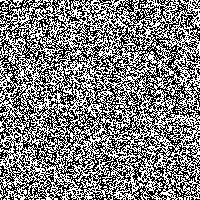

In [67]:
display_spin_field(random_spin_field(200,200))

In [77]:
def ising_step(field, beta=0.5):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m, beta)
    return field


def _ising_update(field, n, m, beta):
    total = 0
    N, M  = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1
                

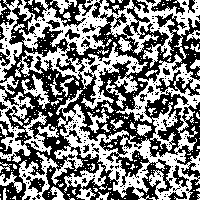

In [78]:
display_spin_field(ising_step(random_spin_field(200, 200)))

In [ ]:
# Animate using ipywidgets

In [73]:
from ipywidgets import interact

In [74]:
def display_ising_sequence(images):
    def _show(frame=(0, len(images) -1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [79]:
images = [random_spin_field(200, 200)]
for i in range(50):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images)

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

<function __main__.display_ising_sequence.<locals>._show(frame=(0, 50))>

In [92]:
%%cython
import numpy as np
cimport numpy as np # gives you access to Numpy C API
def cy_ising_step(field, beta=0.5):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update(field, n, m, beta)
    return field


def _cy_ising_update(field, n, m, beta):
    total = 0
    N, M  = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

In [93]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

718 ms ± 85.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
557 ms ± 37.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [110]:
%%cython
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API

def cy_ising_step_fast(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_fast(field, n, m, beta)
    return field


cdef _cy_ising_update_fast(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

In [97]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

745 ms ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
665 ms ± 58.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
89.5 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [119]:
%%cython 
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API

from libc.math cimport exp
from libc.stdlib cimport rand  
cdef extern from "limits.h":
    int RAND_MAX

def cy_ising_step_faster(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_faster(field, n, m, beta)
    return field


cdef _cy_ising_update_faster(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif exp(-dE * beta) > rand()/RAND_MAX:
        field[n, m] *= -1

In [113]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

%timeit cy_ising_step_faster(field)

655 ms ± 97.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
551 ms ± 38.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
85.1 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.43 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [117]:
%%cython 
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API
cimport cython

from libc.math cimport exp
from libc.stdlib cimport rand  
cdef extern from "limits.h":
    int RAND_MAX

@cython.boundscheck(False) # dont check index boundaries
@cython.wraparound(False) # can not use negative index
def cy_ising_step_fastest(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_fastest(field, n, m, beta)
    return field


cdef _cy_ising_update_fastest(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif exp(-dE * beta) > rand()/RAND_MAX:
        field[n, m] *= -1

In [118]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

%timeit cy_ising_step_faster(field)

%timeit cy_ising_step_fastest(field)

692 ms ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
977 ms ± 498 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
76.5 ms ± 5.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.41 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.03 ms ± 669 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
